## Import Required Libraries

In [2]:
# Basic imports
import pandas as pd
import numpy as np

# Clustering and metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Dimensionality reduction for visualization
from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
sns.set(style="whitegrid")

## Load Cleaned Data

In [6]:
df = pd.read_csv("../data/bank_cleaned.csv")

data = df.copy()
print(data.shape)
data.head()

(11162, 39)


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Separate Features

In [7]:
X = data.drop(columns=['deposit'], errors='ignore')

X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,False,True,False,False,False,False,False


## Choose Number of Clusters (Using Elbow Method)

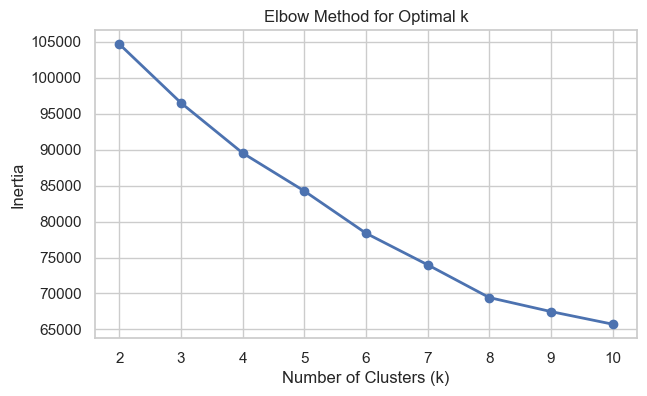

In [8]:
inertia = []
K = range(2, 11)  # Test from 2 to 10 clusters

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(7,4))
plt.plot(K, inertia, 'o-', linewidth=2)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

## Fit K Means

In [9]:
k = 4  # Change this based on your elbow result

kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(X)

# Add the cluster labels to your dataframe
data['Cluster'] = labels
data.head()


,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,Cluster
0,1.491505,0,0.252525,1,0,-1.265746,1.930226,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
1,1.239676,0,-0.459974,0,0,-1.265746,3.154612,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
2,-0.019470,0,-0.080160,1,0,-1.265746,2.929901,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,0
3,1.155733,0,0.293762,1,0,-1.265746,0.596366,-0.554168,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,1
4,1.071790,0,-0.416876,0,0,-1.265746,0.867171,-0.186785,-0.092973,-0.36326,...,False,False,False,True,False,False,False,False,False,1


## Evaluate Clustering Performance

In [10]:
silhouette = silhouette_score(X, labels)
calinski = calinski_harabasz_score(X, labels)
davies = davies_bouldin_score(X, labels)

print(f"Silhouette Score: {silhouette:.3f}")
print(f"Calinski-Harabasz Index: {calinski:.3f}")
print(f"Davies-Bouldin Index: {davies:.3f}")

Silhouette Score: 0.101
Calinski-Harabasz Index: 939.829
Davies-Bouldin Index: 2.339


## Visualize Clusters (PCA to 2D)

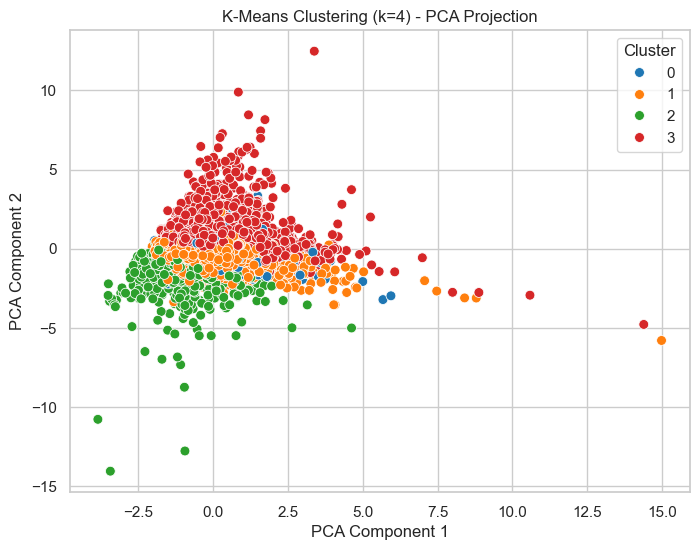

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette="tab10", s=50)
plt.title(f'K-Means Clustering (k={k}) - PCA Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()